## Исследование данных о российском кинопрокате



# Содержание.

1. Исследование данных о российском кинопрокате.
2. Исходные данные.
3. Предобработка данных.
*    3.1   Проверка типов данных.
*    3.2  Изучение пропусков в датафрейме.
*    3.3  Проверка на дубликаты в датафрейме.
*    3.4  Изучение категориальных значений.
*    3.5  Проверка количественных значений.
*    3.6  Добавление новых столбцов.
4. Исследовательский анализ данных.
*    4.1  Количество фильмов вышедших в прокат.
*    4.2  Динамика проката по годам.
*    4.3  Средняя и медианная сумму сборов.
*    4.4  Возрастное ограничение аудитории.
5. Исследование фильмов, которые получили государственную поддержку.
6. Общий вывод.

# 1. Исследование данных о российском кинопрокате.

Поставлена задача изучить рынок российского кинопроката и выявить текущие тренды. Были получены данные о прокатных удостоверениях, сборах и государственной поддержке фильмов, опубликованные на портале Министерства культуры. Информация получена с сайта КиноПоиск.

# 2. Исходные данные

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

Импортируем библиотеки.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Откроем таблицы с данными и изучим информацию.

In [2]:
if os.path.exists('mkrf_movies.csv'): #проверяем доступность пути к датасету при работе с портала и локально.
    movies = pd.read_csv('mkrf_movies.csv')
else:
    movies = pd.read_csv('/datasets/mkrf_movies.csv')
    
if os.path.exists('mkrf_shows.csv'): #проверяем доступность пути к датасету при работе с портала и локально.
    shows = pd.read_csv('mkrf_shows.csv')
else:
    shows = pd.read_csv('/datasets/mkrf_shows.csv')
    
movies.info()
print()
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

В таблице shows содержит только сведения о показах фильмов в российских кинотеатрах, поэтому базовой таблицей для объединения выберем movies. Объединение будем проводить по общему столбцу с номерами прокатных удостоверений puNumber.

Просмотрим первые и последние 5 строк таблицы с данными movies.

In [3]:
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


Посмотрим 5 нижних строк таблицы movies.

In [4]:
shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [5]:
movies.tail()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер"
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7485,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.3,"комедия,вестерн"


Просмотрим первые и последние 5 строк таблицы с данными shows.

In [6]:
shows.tail()

,puNumber,box_office
3153,224014814,1530.0
3154,224021411,9270.0
3155,224022410,400.0
3156,224023210,360.0
3157,224026410,400.0


Таблица mkrf_movies содержит следующую информацию из реестра прокатных удостоверений:
* title — название фильма;
* puNumber — номер прокатного удостоверения;
* show_start_date — дата премьеры фильма;
* type — тип фильма;
* film_studio — студия-производитель;
* production_country — страна-производитель;
* director — режиссёр;
* producer — продюсер;
* age_restriction — возрастная категория;
* refundable_support — объём возвратных средств государственной поддержки;
* nonrefundable_support — объём невозвратных средств государственной поддержки;
* financing_source — источник государственного финансирования;
* budget — общий бюджет фильма;
* ratings — рейтинг фильма на КиноПоиске;
* genres — жанр фильма.

Таблица mkrf_shows содержит следующие сведения о показах фильмов в российских кинотеатрах:
* puNumber — номер прокатного удостоверения;
* box_office — сборы в рублях.

Проверим тип данных в столбце puNumber в каждой из таблиц.

In [7]:
display(movies.info())
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


В таблице movies, в столбце puNumber есть строковое значение, которое мешает приведению в целочисленное значение. Напишем функцию чтобы найти его:

In [8]:
def check_int(value):
    try:
        int(value)
        return True
    except:
        return False

movies['puNumber_int'] = movies['puNumber'].apply(check_int)

movies.query('puNumber_int == False')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,puNumber_int
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,False


Удалим одну запись, где отсутствует номер прокатного удостоверения.

In [9]:
movies = movies.drop(index=[1797])

Изменим тип данных столбца puNumber в таблице movies на целочисленный.

In [10]:
movies['puNumber'] = movies['puNumber'].astype('int')

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  puNu

Объединим таблицы movies и shows по столбцу puNumber.

In [12]:
data = movies.merge(shows, on = 'puNumber', how = 'left', indicator = True) 

Проверим получившийся датафрейм.

In [13]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,puNumber_int,box_office,_merge
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",True,NaN,left_only
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",True,NaN,left_only
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",True,NaN,left_only
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",True,NaN,left_only
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",True,NaN,left_only


Приведём названия колонок к змеиному регистру.

In [14]:
data.rename(columns = {'puNumber':'pu_number'}, inplace = True)

Проверим.

In [15]:
data

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,puNumber_int,box_office,_merge
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",True,NaN,left_only
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",True,NaN,left_only
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",True,NaN,left_only
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",True,NaN,left_only
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",True,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,left_only
7481,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",True,NaN,left_only
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,left_only
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,left_only


Были объеденены все данные в одну таблицу. Также, поправили названия столбцов, чтобы они соответствовали стандарту.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   title                  7485 non-null   object  
 1   pu_number              7485 non-null   int64   
 2   show_start_date        7485 non-null   object  
 3   type                   7485 non-null   object  
 4   film_studio            7467 non-null   object  
 5   production_country     7483 non-null   object  
 6   director               7476 non-null   object  
 7   producer               6917 non-null   object  
 8   age_restriction        7485 non-null   object  
 9   refundable_support     332 non-null    float64 
 10  nonrefundable_support  332 non-null    float64 
 11  budget                 332 non-null    float64 
 12  financing_source       332 non-null    object  
 13  ratings                6519 non-null   object  
 14  genres                 6510 non-null   o

Приведем значения в столбце show_start_date в формат даты.

In [17]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'])

Изменим тип данных столбца ratings

In [18]:
data['ratings'] = pd.to_numeric(data['ratings'], errors = 'coerce')

Проверим данные.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   pu_number              7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Была поменяна часть типов данных на более оптимальные.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [20]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   995
genres                    975
puNumber_int                0
box_office               4327
_merge                      0
dtype: int64

Объём данных в таблице movies: 7 485 записей. Заметно, что во многих колонках есть пропуски значений:
*    film_studio: у 18 фильмов не указана студия-производитель. Нужно заменить пропуски на "неизвестно";
*    production_country: у 2 фильмов не указана страна производства. Нужно заменить пропуски на "неизвестно";
*    director: режиссер не указан в 9 фильмах. Нужно заменить пропуски на "неизвестно";
*    producer: продюсер не указан для 568 фильмах. Нужно заменить пропуски на "неизвестно";
*    только у 5% фильмов есть информация о бюджете фильма, а также об источнике государственного финансирования и объёмах возвратных и невозвратных средств государственной поддержки. Это связано с тем, что для фильмов, которые не получали государственную поддержку, данные о бюджете не указаны. Оставим данные пропуски как есть;
*    ratings: для 995 фильмов рейтинги не указаны. Оставим пропуски как есть;
*    genres: 976 фильмов остались без информации о жанре. Нужно заменить пропуски на "неизвестно";
*    box_office: 4328 записей о кассовых сборах не заполнены. Возможно, произошел сбой в выгрузке информации или они не заполнялись. Также оставим пропуски, чтобы не было искажения информации о кассовых сборах.

Проверим, много ли фильмов имеет одновременно пропуски и по рейтингу и по жанру. Если это так, то имеет смысл удалить данные фильмы.

Заменяем пропуски на "неизвестно".

In [21]:
list_1 = ['film_studio', 'production_country', 'director', 'producer', 'genres']
for i in list_1:
    data[i] = data[i].fillna('неизвестно')

Пропуски изучены и обработаны.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Делаем проверку на явные дубликаты.

In [22]:
data.duplicated().sum()

0

Проверим, есть ли дубликаты в столбце с номером прокатного удостоверения.

In [23]:
data['pu_number'].duplicated().sum()

2

Датафрейм содержит всего 2 дубликата.

Посмотрим на эти дубликаты.

In [24]:
data[data.duplicated(subset = ['pu_number'], keep = False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,puNumber_int,box_office,_merge
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",True,NaN,left_only
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",True,NaN,left_only
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",True,NaN,left_only
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",True,NaN,left_only


Видно, что оба дубликата на самом деле не являются таковыми, потому что:
*    у pu_number 221154310 различается название фильма.
*    у pu_number 221054410 различаются рейтинги.
*    Возможно, что это была ошибка ввода, или технический сбой при присванивании номера выдаваемому прокатному удостоверению. Удалять данные дубликаты не нужно, но можно вручную присвоить им другие номера прокатных удостоверений. Чтобы убедиться, что будут присвоены уникальные номера pu_number, ознакомимся с имеющимися значениями:

In [25]:
data['pu_number'].describe()

count    7.485000e+03
mean     1.351966e+08
std      3.835292e+07
min      1.811096e+06
25%      1.120251e+08
50%      1.210155e+08
75%      1.240033e+08
max      2.310011e+08
Name: pu_number, dtype: float64

Присвоим два значения pu_number, которые не встречаются (100000000 и 100000001)

In [26]:
data.loc[((data['pu_number'] == 221154310) & (data['title'] == 'Как жениться и остаться холостым')),'pu_number'] = 100000000
data.loc[((data['pu_number'] == 221054410) & (data['title'] == 'Анализируй то!')),'pu_number'] = 100000001

Проверим, остались ли еще дубликаты в столбце с номером прокатного удостоверения.

In [27]:
data['pu_number'].duplicated().sum()

0

Дубликатов в столбце с номером прокатного удостоверения не осталось.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Удалим из столбца type лишние пробелы, которые встречаются в начале и в конце строки.

In [28]:
data['type'] = data['type'].str.strip()

Удалим из столбца production_country лишние пробелы, которые встречаются внутри строки.

In [29]:
data['production_country'] = data['production_country'].replace(' ', '', regex = True)

Заменим в столбце production_country дефис на запятую в целях единообразия разделителей.

In [30]:
data['production_country'] = data['production_country'].replace('-', ',', regex = True)

In [31]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [32]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [33]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'неизвестно', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'ко

Некоторые значения в категориальных переменных хранятся как списки: несколько стран, режиссеров, студий, жанров и т.д. Можно выделить первые значения из этих списков чтобы решить данную проблему.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Смотрим количественные значения.

In [34]:
data.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.485000e+03,3.320000e+02,3.320000e+02,3.320000e+02,6490.000000,3.158000e+03
mean,1.351642e+08,1.186446e+07,4.898099e+07,1.272297e+08,6.479245,7.647870e+07
std,3.833150e+07,2.491656e+07,5.998012e+07,1.885883e+08,1.101665,2.403531e+08
min,1.811096e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,1.120249e+08,0.000000e+00,2.500000e+07,4.200000e+07,5.900000,8.623900e+04
50%,1.210154e+08,0.000000e+00,3.000000e+07,6.864992e+07,6.600000,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,7.200000,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.200000,3.073569e+09


Посчитаем количество фильмов, в которых бюджет составляет 0 руб, несмотря на наличие nonrefundable_support.

In [35]:
data[(data['nonrefundable_support'] != 0) & (data['budget'] == 0)]['title'].count()

16

Удалим эти 16 записей и проверим результат.

In [36]:
data = data[(data['nonrefundable_support'] != 0)&(data['budget']!= 0)]
data[(data['nonrefundable_support'] != 0)&(data['budget'] == 0)]['title'].count()

0

Проверим, остались ли фильмы в которых объем невозвратных средств составляет 0 руб.

In [37]:
data.loc[data['nonrefundable_support'] == 0]['title'].count()

0

Посчитаем количество фильмов, в которых кассовые сборы составляет менее 500 руб.

In [38]:
data[data['box_office'] < 1000]['title'].count()

231

Количественные значения содержатся в следующих столбцах:

* budget. Бюджет фильма указан только в случае, если была получена гос.поддержка. Это нормально и может объясняется невозможностью получить данные о бюджете фильмов, которые были сняты без господдержки. Однако вызывают сомнение данные, в которых бюджет составляет 0 руб, несмотря на наличие nonrefundable_support - количество таких фильмов 16. Вероятно, что в них забыли указать реальный бюджет фильма. Принимаю решение удалить эти значения.
* refundable_support. Получение гос.поддержки не всегда означает, что будет возвращена какая-то часть средств (т.е. объем возвратных средств гос.поддержки во многих случает составляет 0 руб). Это нормально.
* nonrefundable_support. Получение гос.поддержки всегда означает наличие какого-то объёма невозвратных средств. Поэтому выглядят подозрительными 9 фильмов с гос.поддержкой, у которых объём невозвратных средств составляет 0 руб. Скорее всего, забыли указать сумму nonrefundable_support. Считаю, что эти фильмы нужно удалить вместе с теми 16 записями с нулевым бюджетом.
* ratings указан не для всех фильмов, но данные подозрения не вызывают.
* box_office (кассовые сборы) указаны только для половины фильмов. Известно, что сумма указана в руб. Выглядят подозрительными кассовые сборы c маленькими значениями. Например, у 231 фильмов сборы составили менее 1000 руб. Это выглядит неправдоподобно. Возможная причина этого в том, что забыли написать нужное количество нолей (т.е. сумма должна была быть указана в тыс руб/в млн руб). Либо исходная сумма могла быть в другой валюте.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

Создаем столбец с годом премьеры фильма.

In [39]:
pd.options.mode.chained_assignment = None
data['year'] = pd.DatetimeIndex(data['show_start_date']).year

Выделиv год из даты премьеры фильма.

In [40]:
data['year'].value_counts()

2010    985
2019    927
2018    886
2016    815
2014    805
2015    696
2013    630
2011    622
2012    593
2017    501
Name: year, dtype: int64

In [41]:
data

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,puNumber_int,box_office,_merge,year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",True,NaN,left_only,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",True,NaN,left_only,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",True,NaN,left_only,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",True,NaN,left_only,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",True,NaN,left_only,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,неизвестно,True,NaN,left_only,2019
7481,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",True,NaN,left_only,2019
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер","США,Канада",Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,неизвестно,True,NaN,left_only,2019
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","РеспубликаКипр,Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,неизвестно,True,NaN,left_only,2019


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

Создадим столбец с именем главного режиссера.

In [42]:
data['director_first'] = data['director'].str.split(",").str[0]
data['director_first'] = data['director_first'].str.strip()

Создадим столбец с главной страной.

In [43]:
df_country = data['production_country'].str.split(',', expand = True)
data['country_first'] = df_country[0]

Создадим столбец с названием главного жанра.

In [44]:
data['genre_first'] = data['genres'].str.split(",").str[0]
data['genre_first'] = data['genre_first'].str.strip()

Проверим результат.

In [45]:
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,puNumber_int,box_office,_merge,year,director_first,country_first,genre_first
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,...,NaN,7.2,"боевик,драма,мелодрама",True,NaN,left_only,2015,Кевин Костнер,США,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,...,NaN,6.6,"драма,военный",True,NaN,left_only,2016,Е.Матвеев,СССР,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,6.8,"фантастика,боевик,триллер",True,NaN,left_only,2016,Тимур Бекмамбетов,США,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,6.8,"фантастика,боевик,триллер",True,NaN,left_only,2016,Тимур Бекмамбетов,США,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,6.8,"фантастика,боевик,триллер",True,NaN,left_only,2015,Тимур Бекмамбетов,США,фантастика


In [46]:
data

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,puNumber_int,box_office,_merge,year,director_first,country_first,genre_first
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,...,NaN,7.2,"боевик,драма,мелодрама",True,NaN,left_only,2015,Кевин Костнер,США,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,NaN,...,NaN,6.6,"драма,военный",True,NaN,left_only,2016,Е.Матвеев,СССР,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,6.8,"фантастика,боевик,триллер",True,NaN,left_only,2016,Тимур Бекмамбетов,США,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,6.8,"фантастика,боевик,триллер",True,NaN,left_only,2016,Тимур Бекмамбетов,США,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,6.8,"фантастика,боевик,триллер",True,NaN,left_only,2015,Тимур Бекмамбетов,США,фантастика
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,...,NaN,NaN,неизвестно,True,NaN,left_only,2019,Фил Грабски,Великобритания,неизвестно
7481,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,...,NaN,5.4,"боевик,триллер",True,NaN,left_only,2019,Ник Пауэлл,США,боевик
7482,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер","США,Канада",Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,...,NaN,NaN,неизвестно,True,NaN,left_only,2019,Чарльз Е.Бастьен,США,неизвестно
7483,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","РеспубликаКипр,Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,...,NaN,NaN,неизвестно,True,NaN,left_only,2019,А.Беляев,РеспубликаКипр,неизвестно


Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

Добавим в таблицу столбец total_support, в котором сумируем объем возвратных и невозвратных средств гос.поддержки.

In [47]:
data['total_support'] = data['refundable_support'] + data['nonrefundable_support']

Добавим столбец с расчетом доли каждого вида гос.поддержки от общего бюджета фильма.

In [48]:
data['%_total_support'] = data['total_support'] / data['budget']
data['%_refundable_support'] = data['refundable_support'] / data['budget']
data['%_nonrefundable_support'] = data['nonrefundable_support'] / data['budget']

Проверяем результат.

In [49]:
data[(data['budget'] > 0)].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,box_office,_merge,year,director_first,country_first,genre_first,total_support,%_total_support,%_refundable_support,%_nonrefundable_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,365353.6,both,2013,А.Атанесян,Россия,драма,26500000.0,0.333703,0.0,0.333703
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,28140.0,both,2014,А.Якимчук,Россия,неизвестно,26000000.0,0.700000,0.0,0.700000
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,19957031.5,both,2013,Р.Давлетьяров,Россия,комедия,107847945.0,0.612691,0.0,0.612691
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,55917.5,both,2014,Е.Миндадзе (псевдоним Катя Шагалова),Россия,драма,28000000.0,0.690095,0.0,0.690095
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,232100.0,both,2014,М.Угаров,Россия,драма,25000000.0,0.624764,0.0,0.624764


Пока исключим из анализа фильмы, по которым не были заполненные данные по бюджету фильма, а также по объему невозвратных средств гос.поддержки.

In [50]:
list = ['budget', 'total_support', 'refundable_support', 'nonrefundable_support', '%_total_support', '%_refundable_support', '%_nonrefundable_support']
data[list].describe()

,budget,total_support,refundable_support,nonrefundable_support,%_total_support,%_refundable_support,%_nonrefundable_support
count,3.070000e+02,3.070000e+02,3.070000e+02,3.070000e+02,307.000000,307.000000,307.000000
mean,1.333371e+08,5.977107e+07,1.041042e+07,4.936065e+07,0.519514,0.057192,0.462322
std,1.929219e+08,7.387266e+07,2.385699e+07,6.015006e+07,0.168866,0.104377,0.184470
min,1.446246e+07,3.000000e+06,0.000000e+00,3.000000e+06,0.044043,0.000000,0.024553
25%,4.551094e+07,2.510000e+07,0.000000e+00,2.500000e+07,0.375000,0.000000,0.323825
50%,7.087617e+07,3.500000e+07,0.000000e+00,3.000000e+07,0.593163,0.000000,0.476190
75%,1.482258e+08,6.000000e+07,1.000000e+07,4.000000e+07,0.657363,0.090520,0.648232
max,2.305074e+09,5.000000e+08,1.800000e+08,4.000000e+08,0.784745,0.603861,0.700000


Тут видно, что медианная величина бюджета фильма с гос.поддержкой составляет около 71 млн руб, в то время как средняя величина составляет 133 млн руб. Это свидетельствует о том, что есть некоторые фильмы, снятые с гос.поддержкой с очень значительным бюджетом. Их бюджет повлиял на среднюю величину, но не затронул значение медианного бюджета.

Объем средств гос.поддержки в среднем составляет около 35 млн руб, т.е. около 59% от бюджета фильма. Причем, гос.поддержка в основном представляет собой именно невозвратные средства в размере около 30 млн руб.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

Смотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Посмотрим, сколько фильмов выходило в прокат по кинотеатрам каждый год.

In [51]:
cinema = data.groupby('year')['box_office'].count()
cinema = cinema.to_frame().reset_index()
cinema.rename(columns = {'box_office':'number_of_films_cinema'}, inplace=True)
cinema

,year,number_of_films_cinema
0,2010,105
1,2011,109
2,2012,128
3,2013,184
4,2014,278
5,2015,456
6,2016,523
7,2017,353
8,2018,470
9,2019,527


Посмотрим, сколько фильмов выходило в целом в прокат каждый год и объединим с данными в кинотеатрах.

In [52]:
films = data.groupby('year')['title'].count()
films = films.to_frame().reset_index()
films.rename(columns = {'title':'number_of_films'}, inplace=True)
films['number_of_films_cinema'] = cinema['number_of_films_cinema']
films['%_of_cinema'] = films['number_of_films_cinema'] / films['number_of_films']
display(films)

,year,number_of_films,number_of_films_cinema,%_of_cinema
0,2010,985,105,0.106599
1,2011,622,109,0.175241
2,2012,593,128,0.215852
3,2013,630,184,0.292063
4,2014,805,278,0.345342
5,2015,696,456,0.655172
6,2016,815,523,0.641718
7,2017,501,353,0.704591
8,2018,886,470,0.530474
9,2019,927,527,0.568501


Рассчитаем среднее количество фильмов в год.

In [53]:
print('Cреднее количество фильмов в год: %.0f' % films['number_of_films'].mean())
print('Cреднее количество фильмов в кинотеатрах в год: %.0f' % cinema['number_of_films_cinema'].mean())
print('Доля фильмов с указанной информацией о прокате в кинотеатрах: %.2f' % films['%_of_cinema'].mean())

Cреднее количество фильмов в год: 746
Cреднее количество фильмов в кинотеатрах в год: 313
Доля фильмов с указанной информацией о прокате в кинотеатрах: 0.42


Построим гистограмму по данным о прокате в целом, и о прокате в кинотеатрах.

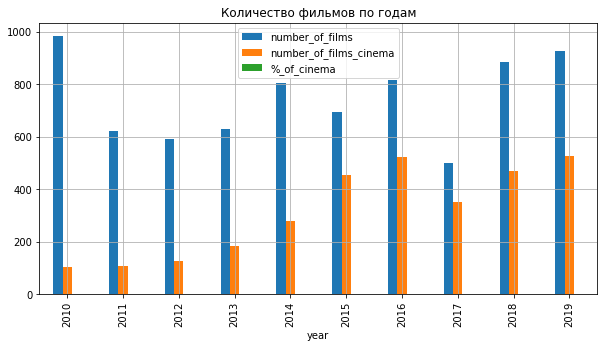

In [54]:
films.plot(x = 'year', kind = 'bar', figsize = (10, 5), grid = True, title = 'Количество фильмов по годам')
plt.show()

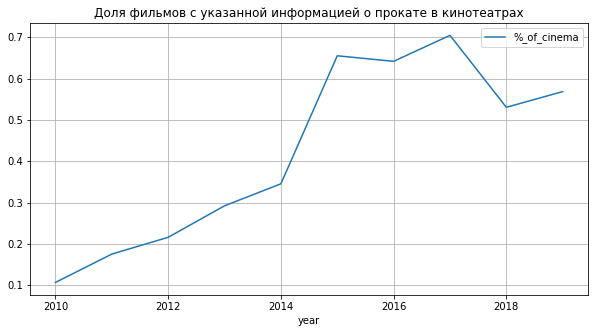

In [55]:
films.plot(x = 'year', y = '%_of_cinema', figsize = (10, 5), grid = True, title = 'Доля фильмов с указанной информацией о прокате в кинотеатрах')
plt.show()

Данные о прокате в кинотеатрах известны не для всех фильмов. Это значит, что часть фильмов получили удостоверение на прокат по телевидению. В среднем, в прокат выходило около 746 фильмов в год, а в прокат по кинотеатрам выходило в 2 раза меньше - 313 фильмов в год. В целом, количество фильмов выходивших в прокат стабильно, чего не скажешь про количество фильмов выходивших в прокат по кинотеатрам. Оно стаильно растет. Меньше всего фильмов вышло в прокат по кинотеатрам в 2010 году (это начало исследуемого периода) - всего 105 фильмов. Затем это количество постепенно увеличивалось до 523 в 2016 году. На следующий год количество фильмов упало до 353, а затем, в течение еще 3 лет постепенно увеличивалось до 527 фильмов в 2019 году (это максимум). В общем, можно утверждать, что и количество фильмов, вышедших в прокат по кинотеатрам, и доля фильмов с указанной информацией о прокате в кинотеатрах стабильно растет. Это может быть связано со следующими факторами:

* начиная с 2014-2015 активно начали развиваться онлайн кинотеатры (типа Okko, Ivi и пр.). Благодаря чему, выросло количество кассовых сборов кинотеатров;
* также благодаря цифровым технологиям прогрессирует борьба с пиратством. Людям проще заплатить за фильм, чем пытаться найти его для росмотра на бесплатном ресурсе;
* ещё, можно рассмотреть влияние стоимости прокатных удостоверений. Возможно, в последние годы стоиомость прокатного удостоверения для кинотеатров могла снизиться.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Посмотрим на величину проката за каждый год.

In [56]:
revenue = data.groupby('year')['box_office'].agg(['sum','count', 'mean'])
revenue

,sum,count,mean
year,,,
2010,2.428654e+06,105,2.313004e+04
2011,1.410276e+07,109,1.293832e+05
2012,6.955423e+06,128,5.433924e+04
2013,2.979971e+07,184,1.619549e+05
2014,7.434718e+09,278,2.674359e+07
2015,3.842744e+10,456,8.427071e+07
2016,4.674232e+10,523,8.937345e+07
2017,4.736491e+10,353,1.341782e+08
2018,4.867462e+10,470,1.035630e+08


Посторим  график, отражающий зависимость между величиной кассовых сборов и годом.

Text(0, 0.5, 'Кассовые сборы, млрд.руб')

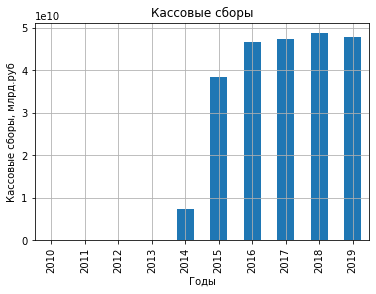

In [57]:
revenue['sum'].plot(kind = 'bar', grid = True)
plt.title('Кассовые сборы')
plt.xlabel('Годы')
plt.ylabel('Кассовые сборы, млрд.руб')

Здесь видно, что с каждым годом объем кассовых сборов только увеличивается. Минимальная общая сумма кассовых сборов составила 2,4 млн руб - это было в 2010 году. А максимальная сумма составила 201,8 трлн руб - это было в 2018 году.
Причем в 2018 (475 фильмов из 889) сведений о кассовых сборах по фильмам было в 4,5 раза больше, чем в 2010 (105 фильмов). Но рост в объеме кассовых сборов несопоставим с ростом количества фильмов. Это означает, что растёт именно средняя величина кассовых сборов по фильмам.
В 2010 средние сборы за фильм составили 23 тыс руб. Эта цифра наверняка не отражает действительность. Для интереса посмотрим, какие максимальные сборы были у самых успешных фильмов.

Посмотрим, какие фильмы собрали максимальные сборы в 2010.

In [58]:
revenue_data = data.pivot_table(index = ['title', 'year'], values = 'box_office', aggfunc = 'sum')
revenue_data.query('year == 2010').sort_values(by = 'box_office', ascending = False).head()

,,box_office
title,year,
Морские динозавры 3D: Путешествие в доисторический мир,2010,1446400.0
Хаббл 3D,2010,245630.0
Братья .,2010,168411.0
Стоун,2010,54060.0
Три богатыря и Шамаханская царица,2010,45225.0


Тут видно, что согласно данным, в 2010 максимальные сборы имели следующие фильмы:

* "Морские динозавры 3D" - сборы составили 1,4 млн.руб;
* "Хаббл 3D" - собрано 246 тыс.руб;
* "Братья" - сборы составили 168 тыс.руб;
* "Стоун" - сбора составили 54 тыс.руб;
* "Три богатыря и Шамаханская царица" - собрано всего 45 тыс.руб.
Данные показатели выглядят неправдоподобно низкими для сборов фильма. Скорее всего, при выгрузке данных была перепутана валюта, или разряд цифр.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

,mean,median
,box_office,box_office
year,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.433924e+04,5660.000
2013,1.619549e+05,3522.500
2014,2.674359e+07,18137.500
2015,8.427071e+07,4742671.665
2016,8.937345e+07,3776087.560
2017,1.341782e+08,9876765.000


Text(0, 0.5, 'Кассовые сборы')

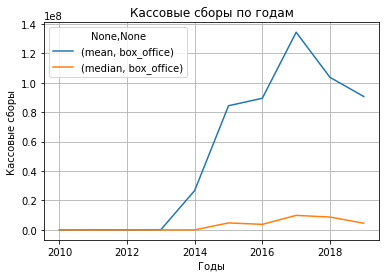

In [59]:
box_office_year = data.pivot_table(index = 'year', values = 'box_office', aggfunc = ['mean', 'median'])
display(box_office_year)
box_office_year.plot(grid = True)
plt.title('Кассовые сборы по годам')
plt.xlabel('Годы')
plt.ylabel('Кассовые сборы')

Здесь видно, что медиана по кассовым сборам во много раз меньше среднего каждый год. Это свидетельствует о том, что есть некоторое количество фильмов с очень значительными сборами, что повлияло на среднююю величину.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Определеим сумму кассовых сборов по возрастным ограничениям за период с 2015-2019.

age_restriction
«0+» - для любой зрительской аудитории    8.090774e+08
«12+» - для детей старше 12 лет           5.901553e+10
«16+» - для детей старше 16 лет           7.503778e+10
«18+» - запрещено для детей               4.075766e+10
«6+» - для детей старше 6 лет             5.331283e+10
Name: box_office, dtype: float64

Text(0, 0.5, 'Кассовые сборы')

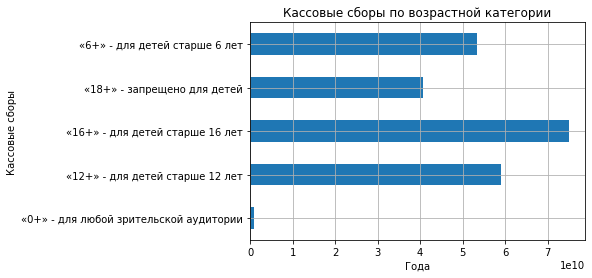

In [60]:
age_restriction_data = data.query('year > 2014').groupby('age_restriction')['box_office'].sum()
display(age_restriction_data)
age_restriction_data.plot(kind = 'barh', grid = True)
plt.title('Кассовые сборы по возрастной категории')
plt.xlabel('Года')
plt.ylabel('Кассовые сборы')

age_restriction
«0+» - для любой зрительской аудитории    3.790546e+08
«12+» - для детей старше 12 лет           1.339986e+10
«16+» - для детей старше 16 лет           1.077057e+10
«18+» - запрещено для детей               5.430351e+09
«6+» - для детей старше 6 лет             8.447618e+09
Name: box_office, dtype: float64

Text(0, 0.5, 'Кассовые сборы')

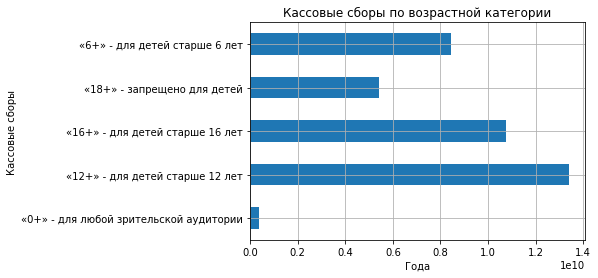

In [61]:
age_restriction_2015 = data.query('year == 2015').groupby('age_restriction')['box_office'].sum()
display(age_restriction_2015)
age_restriction_2015.plot(kind = 'barh', grid = True)
plt.title('Кассовые сборы по возрастной категории')
plt.xlabel('Года')
plt.ylabel('Кассовые сборы')

age_restriction
«0+» - для любой зрительской аудитории    1.502288e+08
«12+» - для детей старше 12 лет           1.115076e+10
«16+» - для детей старше 16 лет           1.659425e+10
«18+» - запрещено для детей               6.793930e+09
«6+» - для детей старше 6 лет             1.205315e+10
Name: box_office, dtype: float64

Text(0, 0.5, 'Кассовые сборы')

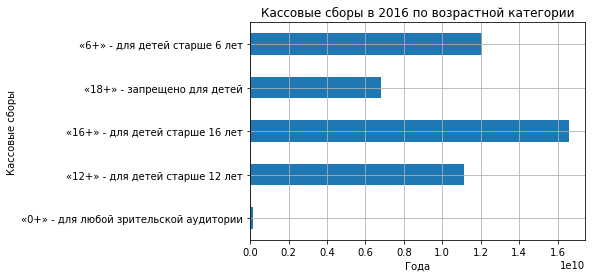

In [62]:
age_restriction_2016 = data.query('year == 2016').groupby('age_restriction')['box_office'].sum()
display(age_restriction_2016)
age_restriction_2016.plot(kind = 'barh', grid = True)
plt.title('Кассовые сборы в 2016 по возрастной категории')
plt.xlabel('Года')
plt.ylabel('Кассовые сборы')

age_restriction
«0+» - для любой зрительской аудитории    2.295989e+08
«12+» - для детей старше 12 лет           7.517420e+09
«16+» - для детей старше 16 лет           1.869459e+10
«18+» - запрещено для детей               9.651496e+09
«6+» - для детей старше 6 лет             1.127181e+10
Name: box_office, dtype: float64

Text(0, 0.5, 'Кассовые сборы')

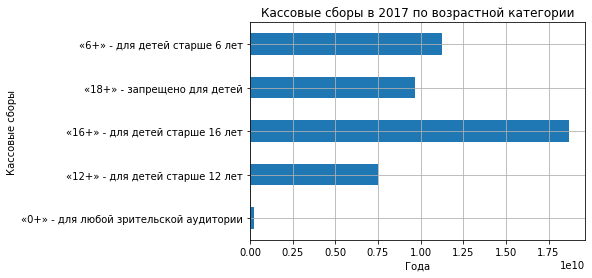

In [63]:
age_restriction_2017 = data.query('year == 2017').groupby('age_restriction')['box_office'].sum()
display(age_restriction_2017)
age_restriction_2017.plot(kind = 'barh', grid = True)
plt.title('Кассовые сборы в 2017 по возрастной категории')
plt.xlabel('Года')
plt.ylabel('Кассовые сборы')

age_restriction
«0+» - для любой зрительской аудитории    3.244900e+07
«12+» - для детей старше 12 лет           1.426729e+10
«16+» - для детей старше 16 лет           1.627841e+10
«18+» - запрещено для детей               8.760086e+09
«6+» - для детей старше 6 лет             9.336390e+09
Name: box_office, dtype: float64

Text(0, 0.5, 'Кассовые сборы')

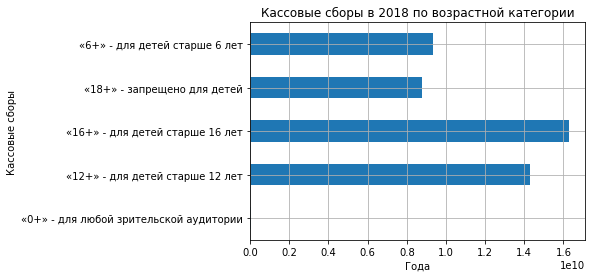

In [64]:
age_restriction_2018 = data.query('year == 2018').groupby('age_restriction')['box_office'].sum()
display(age_restriction_2018)
age_restriction_2018.plot(kind = 'barh', grid = True)
plt.title('Кассовые сборы в 2018 по возрастной категории')
plt.xlabel('Года')
plt.ylabel('Кассовые сборы')

age_restriction
«0+» - для любой зрительской аудитории    1.774607e+07
«12+» - для детей старше 12 лет           1.268020e+10
«16+» - для детей старше 16 лет           1.269997e+10
«18+» - запрещено для детей               1.012180e+10
«6+» - для детей старше 6 лет             1.220387e+10
Name: box_office, dtype: float64

Text(0, 0.5, 'Кассовые сборы')

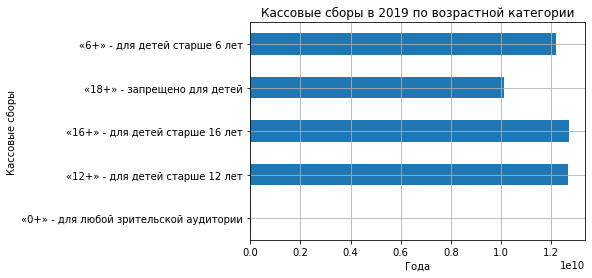

In [65]:
age_restriction_2019 = data.query('year == 2019').groupby('age_restriction')['box_office'].sum()
display(age_restriction_2019)
age_restriction_2019.plot(kind = 'barh', grid = True)
plt.title('Кассовые сборы в 2019 по возрастной категории')
plt.xlabel('Года')
plt.ylabel('Кассовые сборы')

In [66]:
data.query('2015 <= year').groupby('age_restriction')['box_office'].sum().sort_values()

age_restriction
«0+» - для любой зрительской аудитории    8.090774e+08
«18+» - запрещено для детей               4.075766e+10
«6+» - для детей старше 6 лет             5.331283e+10
«12+» - для детей старше 12 лет           5.901553e+10
«16+» - для детей старше 16 лет           7.503778e+10
Name: box_office, dtype: float64

In [67]:
t = data.query('2015 <= year').groupby(['year', 'age_restriction'])['box_office'].agg('sum').reset_index()

In [68]:
t

,year,age_restriction,box_office
0,2015,«0+» - для любой зрительской аудитории,3.790546e+08
1,2015,«12+» - для детей старше 12 лет,1.339986e+10
2,2015,«16+» - для детей старше 16 лет,1.077057e+10
3,2015,«18+» - запрещено для детей,5.430351e+09
4,2015,«6+» - для детей старше 6 лет,8.447618e+09
5,2016,«0+» - для любой зрительской аудитории,1.502288e+08
6,2016,«12+» - для детей старше 12 лет,1.115076e+10
7,2016,«16+» - для детей старше 16 лет,1.659425e+10
8,2016,«18+» - запрещено для детей,6.793930e+09
9,2016,«6+» - для детей старше 6 лет,1.205315e+10


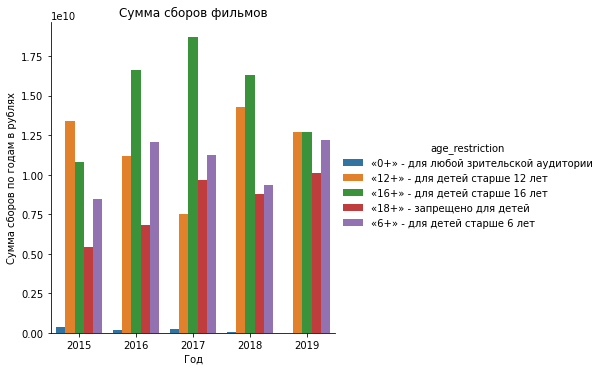

In [69]:
fg = sns.catplot(x = 'year', y = 'box_office', hue = 'age_restriction', data = t, kind = 'bar');
plt.title('Сумма сборов фильмов');
plt.xlabel('Год');
plt.ylabel('Сумма сборов по годам в рублях');

По графику почти во все годы лидирует по сборам кино 16+, в 2015 в лидерах кино 12+, а в 2019 - 12+ и 16+ стоят в лидерах на одном уровне, но и 6+ практически догнало их.

За период с 2015-2019 больше всего кассовых сборов собрали фильмы категории 16+. Далее, идут фильмы категорий 12+ и 6+. Затем идут фильмы категории 18+. Фильмы категории 0+ принесли меньше всего выручки. Анализ кассовых сборов по годам показал следующее:

* 2015: наибольшие кассовые сборы показали фильмы 12+, затем идут фильмы категории 16+ и 6+.
* 2016: начиная с этого года фильмы категории 16+ будут всегда занимать первое место по кассовым сборам. Затем идут фильмы 12+ и 6+ с одинаковыми показателями.
* 2017: фильмы категории 12+ впервые уступили место фильмам 18+.
* 2018: фильмы 12+ заняли второе место, а третье место досталось фильмам категории 6+.
* 2019: почти равномерно распределились фильмы категорий 6+/12+/16+. Ненамного отстают от них фильмы 18+.
Можно утверждать, что есть некоторая закономерность между возрастной категорией и кассовыми сборами. Например, фильмы категории 0+ почти не имеют значительных сборов. Также фильмы категории 18+ пости всегда приносят меньше сборов, чем фильмы категорий 6+/12+/16+. Это, вероятно связано с тем, что их смотрят только совершеннолетние люди, а на фильмы категорий 6+/12+/16+ родители приходят вместе с детьми. Или это, возможно, связано с тем, что основной потребитель киноиндустрии это несовершеннолетняя молодежь.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Создадим таблицу с данными по фильмам с гос.поддержкой.

In [70]:
support_data = data.query('nonrefundable_support >= 0')
display(support_data.head(50))
print('Кол-во прокатных удостоверний у фильмов с гос.поддержкой:', len(support_data['pu_number']),
        ', Кол-во фильмов с гос.поддержкой:', len(support_data['title'].unique()))

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,box_office,_merge,year,director_first,country_first,genre_first,total_support,%_total_support,%_refundable_support,%_nonrefundable_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,3.653536e+05,both,2013,А.Атанесян,Россия,драма,26500000.0,0.333703,0.000000,0.333703
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,2.814000e+04,both,2014,А.Якимчук,Россия,неизвестно,26000000.0,0.700000,0.000000,0.700000
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,1.995703e+07,both,2013,Р.Давлетьяров,Россия,комедия,107847945.0,0.612691,0.000000,0.612691
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,5.591750e+04,both,2014,Е.Миндадзе (псевдоним Катя Шагалова),Россия,драма,28000000.0,0.690095,0.000000,0.690095
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,2.321000e+05,both,2014,М.Угаров,Россия,драма,25000000.0,0.624764,0.000000,0.624764
1853,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.0,...,1.507886e+07,both,2015,С.Серегин,Россия,мультфильм,25000000.0,0.482160,0.000000,0.482160
1869,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,неизвестно,«12+» - для детей старше 12 лет,50000000.0,...,2.491668e+08,both,2015,Р.Давлетьяров,Россия,драма,150000000.0,0.680000,0.226667,0.453333
1870,Две женщины,111013714,2014-10-02 12:00:00+00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия,Франция,Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.0,...,4.731240e+06,both,2014,В.Глаголева,Россия,драма,46502299.0,0.539407,0.000000,0.539407
1902,Призрак_.,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.0,...,3.528043e+08,both,2015,А.Войтинский,Россия,триллер,75000000.0,0.537436,0.000000,0.537436
1911,Ведьма .,111002215,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.0,...,5.190750e+04,both,2015,Д.Федоров,Россия,фэнтези,34000000.0,0.700000,0.000000,0.700000


Кол-во прокатных удостоверний у фильмов с гос.поддержкой: 307 , Кол-во фильмов с гос.поддержкой: 307


Посмотрим информацию с данными по фильмам без гос.поддержки.

In [71]:
no_support_data = data.query('nonrefundable_support.isnull() == True')
print('Кол-во прокатных удостоверний у фильмов без гос.поддержки:', len(no_support_data['pu_number']),
        ', Кол-во фильмов без гос.поддержки:', len(no_support_data['title'].unique()))

Кол-во прокатных удостоверний у фильмов без гос.поддержки: 7153 , Кол-во фильмов без гос.поддержки: 6444


Посчитаем, сколько выделяется средств на поддержку кино за весь период.

In [72]:
display(support_data['total_support'].describe())
print('Суммарная гос.поддержка за весь период: %.0f' % support_data['total_support'].sum())

count    3.070000e+02
mean     5.977107e+07
std      7.387266e+07
min      3.000000e+06
25%      2.510000e+07
50%      3.500000e+07
75%      6.000000e+07
max      5.000000e+08
Name: total_support, dtype: float64

Суммарная гос.поддержка за весь период: 18349718847


Посчитаем, как распределилась гос.поддержка по годам.

In [73]:
support_pivot = support_data.groupby('year')['total_support'].agg(['sum', 'count', 'median'])
support_pivot

,sum,count,median
year,,,
2013,1.343479e+08,2,67173972.5
2014,5.490023e+08,15,28000000.0
2015,3.118241e+09,77,30000000.0
2016,3.977155e+09,58,35000000.0
2017,2.998972e+09,37,37346881.0
2018,2.983000e+09,51,35000000.0
2019,4.589000e+09,67,40000000.0


Посторим  график, отражающий зависимость между величиной гос.поддержки и годом.

Text(0, 0.5, 'Сумма гос.поддержки, млрд.руб')

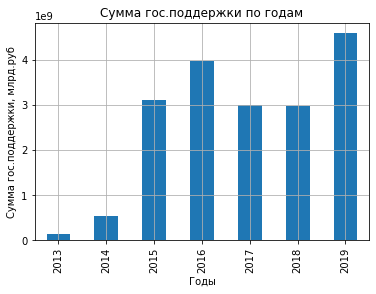

In [74]:
support_pivot['sum'].plot(kind = 'bar', grid = True)
plt.title('Сумма гос.поддержки по годам')
plt.xlabel('Годы')
plt.ylabel('Сумма гос.поддержки, млрд.руб')

Тут видно, что самая наименьшая сумма гос.поддержки была в 2013 году. В 2019 году самая большая сумма выделена на гос.поддержку. Также, примичательно то, что в период с 2015 года по 2018 включительно, сумма  была практически одинаковая по каждому году. Немного выбивается показатеь по 2016 году. Там сумма была чуть больше в рассматриваемый период.

Посторим  график, отражающий зависимость между количеством фильмов снятых с гос.поддержкой и годом.

Text(0, 0.5, 'Количество фильмов')

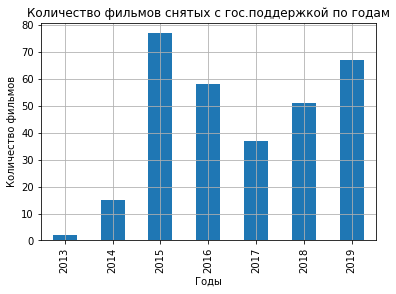

In [75]:
support_pivot['count'].plot(kind = 'bar', grid = True)
plt.title('Количество фильмов снятых с гос.поддержкой по годам')
plt.xlabel('Годы')
plt.ylabel('Количество фильмов')

На этом графике ситуация немного отличается от графика с суммами гос.поддержки. Количество фильмов которые были сняты с гос.поддержкой больше в 2015 году. Возможно, дело в распределении бюджета, поэтому не коррелирует с графиком сумм гос.поддержки по годам.

Посторим  график, отражающий зависимость между медианной величиной гос.поддержки и годом.

Text(0, 0.5, 'Медианная сумма гос.поддержки, десятки млн.руб')

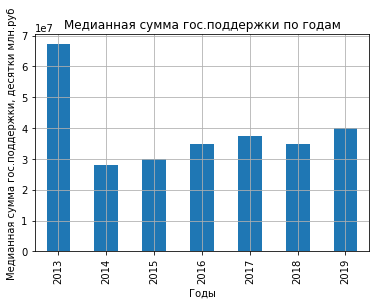

In [76]:
support_pivot['median'].plot(kind = 'bar', grid = True)
plt.title('Медианная сумма гос.поддержки по годам')
plt.xlabel('Годы')
plt.ylabel('Медианная сумма гос.поддержки, десятки млн.руб')

Тут можно видеть, что 2013 год медианная сумма гос.поддержки выше чем по другим годам.

Выведем фильмы выпущенные в прокат в 2013 году.

In [77]:
support_data.query('year == 2013')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,box_office,_merge,year,director_first,country_first,genre_first,total_support,%_total_support,%_refundable_support,%_nonrefundable_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,365353.6,both,2013,А.Атанесян,Россия,драма,26500000.0,0.333703,0.0,0.333703
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,19957031.5,both,2013,Р.Давлетьяров,Россия,комедия,107847945.0,0.612691,0.0,0.612691


year
2013    107847945.0
2014     90000000.0
2015    250000000.0
2016    450000000.0
2017    400000000.0
2018    260000000.0
2019    500000000.0
Name: total_support, dtype: float64

Text(0, 0.5, 'Максимальная сумма гос.поддержки, млн.руб')

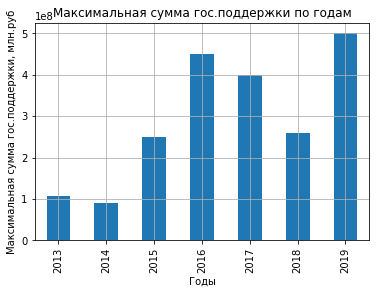

In [78]:
max_support = support_data.groupby('year')['total_support'].agg('max')
display(max_support)

max_support.plot(kind = 'bar', grid = True)
plt.title('Максимальная сумма гос.поддержки по годам')
plt.xlabel('Годы')
plt.ylabel('Максимальная сумма гос.поддержки, млн.руб')

В 2016 и 2019 произошёл резкий рост финансирования. В целом наблюдается тренд на рост финансирования.

Посмотрим значения в колонке box_office.

In [79]:
data['box_office'].value_counts()

0.0            24
200.0          13
300.0          12
360.0           9
400.0           8
               ..
809638458.6     1
220728.0        1
11332412.0      1
268550254.0     1
52984377.0      1
Name: box_office, Length: 2913, dtype: int64

Посмотрим значения в колонке budget.

In [80]:
data['budget'].value_counts(dropna=False)

NaN            7153
38000000.0        6
80000000.0        4
50000000.0        4
37142857.0        3
               ... 
57166797.0        1
109814241.0       1
41000000.0        1
57874375.0        1
42252509.0        1
Name: budget, Length: 282, dtype: int64

Вернемся к тому, что есть несколько строк с пропущенными значениями budget и box_office. Удалим их для чистоты сравнения.

In [81]:
net_support_data = support_data.dropna(subset = ['budget', 'box_office'])

Посчитаем, каков совокупный бюджет фильмов с гос.поддержкой.

In [82]:
print('Суммарный бюджет фильмов с гос.поддержкой за весь период: %.0f' % net_support_data['budget'].sum())
print('Суммарные кассовые сборы фильмов с гос.поддержкой за весь период: %.0f' % net_support_data['box_office'].sum())

Суммарный бюджет фильмов с гос.поддержкой за весь период: 39280394141
Суммарные кассовые сборы фильмов с гос.поддержкой за весь период: 37014670923


Посчитаем, как распределились бюджеты и кассовые сборы по годам.

In [83]:
net_support_pivot = net_support_data.groupby('year')[['box_office', 'budget']].agg(['sum', 'count', 'median'])
net_support_pivot['result', 'sum'] = net_support_pivot['box_office', 'sum'] - net_support_pivot['budget', 'sum']
net_support_pivot

box_office                            budget                     \
               sum count        median           sum count       median   
year                                                                      
2013  2.032239e+07     2  1.016119e+07  2.554354e+08     2  127717695.0   
2014  1.007188e+09    15  4.731240e+06  1.279485e+09    15   70876172.0   
2015  4.715365e+09    76  3.538065e+06  6.731185e+09    76   55567193.5   
2016  4.957724e+09    57  1.681433e+07  7.210237e+09    57   69883049.0   
2017  9.666281e+09    35  3.015617e+07  6.529478e+09    35   80000000.0   
2018  8.940288e+09    51  2.273024e+07  6.466194e+09    51   93000000.0   
2019  7.707502e+09    57  1.887846e+07  1.080838e+10    57   80000000.0   

            result  
               sum  
year                
2013 -2.351130e+08  
2014 -2.722966e+08  
2015 -2.015821e+09  
2016 -2.252512e+09  
2017  3.136803e+09  
2018  2.474094e+09  
2019 -3.100879e+09

Посторим  график, отражающий прибыльность фильмов с гос.поддержкой по годам.

Text(0, 0.5, 'Результат, млрд.руб')

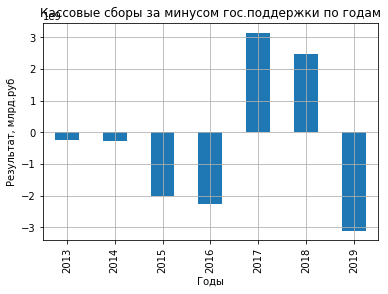

In [84]:
net_support_pivot['result', 'sum'].plot(kind = 'bar', grid = True)
plt.title('Кассовые сборы за минусом гос.поддержки по годам')
plt.xlabel('Годы')
plt.ylabel('Результат, млрд.руб')

Не удивитель, чем меньше гос.поддержка тем меньше кассовые сборы. Это может говорить, например, о качестве фильмов из-за недофинансирования или бедные рекламные компании.

Выведем описание рейтинга фильмов с гос.поддержкой.

In [85]:
display(support_data['ratings'].describe())

count    290.000000
mean       6.026207
std        1.128708
min        1.000000
25%        5.400000
50%        6.200000
75%        6.700000
max        8.500000
Name: ratings, dtype: float64

Выведем описание рейтинга фильмов без гос.поддержки.

In [86]:
no_support_data['ratings'].describe()

count    6176.000000
mean        6.503578
std         1.095038
min         1.100000
25%         5.900000
50%         6.600000
75%         7.300000
max         9.200000
Name: ratings, dtype: float64

Рейтинг фильмов без гос.поддержки больше, чем с поддержкой.

Посмотрим, для каких возрастных категорий снимают фильмы с гос.поддержкой.

<AxesSubplot:ylabel='age_restriction'>

count      5.000000
mean      61.400000
std       46.435977
min        8.000000
25%       27.000000
50%       55.000000
75%      101.000000
max      116.000000
Name: age_restriction, dtype: float64

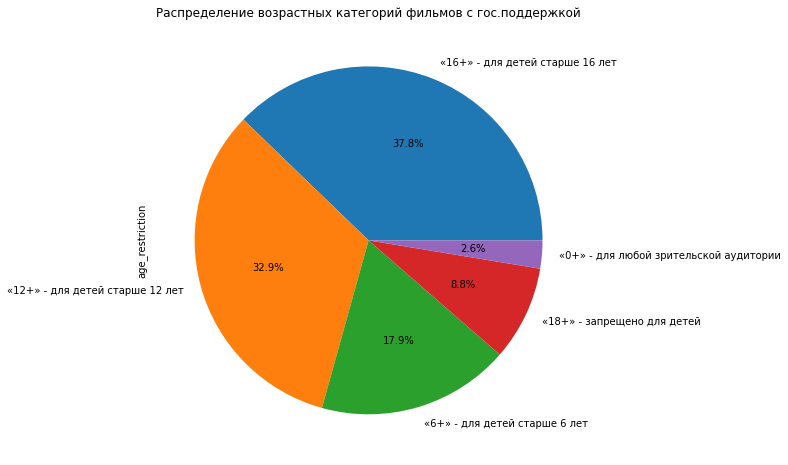

In [87]:
display(support_data['age_restriction'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.1f%%', figsize = (8, 8)))
plt.title('Распределение возрастных категорий фильмов с гос.поддержкой')
support_data['age_restriction'].value_counts().describe()

Большие доли - это возрастная категория 12+ и 16+. По сути, это самая целевая аудитория.

Посмотрим, для каких возрастных категорий снимают фильмы без гос.поддержки.

<AxesSubplot:ylabel='age_restriction'>

count       5.000000
mean     1430.600000
std       844.489372
min       561.000000
25%       803.000000
50%      1486.000000
75%      1577.000000
max      2726.000000
Name: age_restriction, dtype: float64

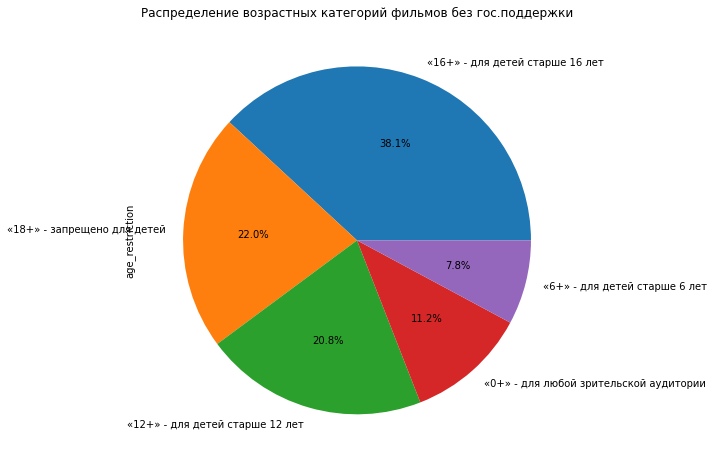

In [88]:
display(no_support_data['age_restriction'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.1f%%', figsize = (8, 8)))
plt.title('Распределение возрастных категорий фильмов без гос.поддержки')
no_support_data['age_restriction'].value_counts().describe()

Тут видно, что в бОльшем приоритете остается категория 16+.

Выведем описание рейтинга фильмов с гос.поддержкой.

In [89]:
display(support_data['age_restriction'].value_counts())

«16+» - для детей старше 16 лет           116
«12+» - для детей старше 12 лет           101
«6+» - для детей старше 6 лет              55
«18+» - запрещено для детей                27
«0+» - для любой зрительской аудитории      8
Name: age_restriction, dtype: int64

Выведем описание рейтинга фильмов без гос.поддержки.

In [90]:
no_support_data['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2726
«18+» - запрещено для детей               1577
«12+» - для детей старше 12 лет           1486
«0+» - для любой зрительской аудитории     803
«6+» - для детей старше 6 лет              561
Name: age_restriction, dtype: int64

Выведем описание рейтинга фильмов с гос.поддержкой.

In [91]:
display(support_data['type'].value_counts())

Художественный    285
Анимационный       21
Документальный      1
Name: type, dtype: int64

Выведем описание рейтинга фильмов без гос.поддержки.

In [92]:
no_support_data['type'].value_counts()

Художественный                5608
Анимационный                   798
Прочие                         406
Документальный                 287
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

Выведем имена главных режиссеров, чьи фильмы получили максимальные оценки зрителей, а также их жанры.

In [93]:
data.query('ratings > 8').groupby(['director_first', 'type'])['ratings'].count().sort_values(ascending = False).head(10)

director_first   type          
Кристофер Нолан  Художественный    8
Питер Джексон    Художественный    7
Ю.Озеров         Художественный    6
Гай Ричи         Художественный    6
Л.Гайдай         Художественный    6
Хаяо Миядзаки    Анимационный      5
Дэвид Финчер     Художественный    4
Дэвид Йейтс      Художественный    4
Роберт Земекис   Художественный    3
Дин Деблуа       Анимационный      3
Name: ratings, dtype: int64

Выведем страны где были сняты фильмы, которые получили максимальные оценки зрителей.

In [94]:
data.query('ratings > 8').groupby('country_first')['ratings'].count().sort_values(ascending = False).head(10)

country_first
США               104
Россия             53
СССР               41
Великобритания     24
Франция            12
Германия            7
Япония              7
РеспубликаКипр      5
Ирландия            3
Индия               3
Name: ratings, dtype: int64

Объем средств выделяемых на гос.поддержку.

Количество фильмов вышедших в прокат за период с 2010-2019 и снятых с гос.поддержкой, составляет 332. Причем, каждому фильму с гос.поддержкой было выдано только одно прокатное удостоверение в отличие от остальных фильмов, где в среднем каждому 10-му фильму выдавалось по 2 удостоверения.

Всего за период с 2013-2019 была оказана гос.поддержка на сумму 20,2 млрд.руб. Медианное значение гос.поддержки одного фильма за весь период с 2013-2019 составляет 35 млн.руб. Однако среднее значение составляет 61 млн.руб. На среднее значение повлияли значительные суммы гос.поддержки некоторых фильмов. Максимальная сумма гос.поддержки составила 500 млн.руб. Минимальное значение гос.поддержки составило 3 млн руб.

Меньше всего фильмов с гос.поддержкой вышло в прокат в 2013 году (2 фильма). В 2014 году вышел уже 61 фильм, а в 2015 году вышло больше всего фильмов с гос.поддержкой за весь рассматриваемый период (86 фильмов). В течение следующих двух лет количество вышедших в прокат фильмов с гос.поддержкой снижалось и в 2017 составило всего 41 фильм. После чего наблюдался стабильный рост количества фильмов с гос.поддержкой. Так к 2019 году было выпущено в прокат 70 фильмов.

Наблюдается аналогичная тенденция и по величине гос.поддержки, за исключением следующего:
* максимальный объем гос.поддержки был предоставлен не в 2015 году, когда было выпущено максимальное количество фильмов с гос.поддержкой, а в 2019 году. Это 4,9 млрд.руб;
* на втором месте по объему гос.поддержки за год занимает 2016. Это 4,3 млрд.руб;
* на третьем месте по объему гос.поддержки находится 2015 год. Это 3,6 млрд.руб.

На 1 фильм в 2013 году, в среднем, было потрачено 67 млн.руб гос.поддержки. Однако, уже в следующем году, в среднем, размер гос.поддержки одного фильма составил в 2 раза меньше, всего 27,5 млн.руб. Объем гос.поддержки постепенно увеличивался вплоть до 2018 года на сумму он 45 млн.руб. Однако на следующий год он снова снизился до уровня 2017 года и составил 40 млн.руб.

В 2013 году максимальная гос.поддержка фильма составляла 108 млн.руб. На следующий год объем гос.поддержки фильма снизился до 90 млн.руб. Однако, начиная с этого времени объем максимальной гос.поддержки стабильно увеличивался в 2016 году и составил уже 450 млн.руб. Затем, в течение двух лет наблюдается снижение максимальной гос.поддерки до 260 млн.руб. А уже в 2019 году фильм получил максимальную сумму гос.поддержки за весь период – 500 млн.руб.

Окупаемость фильмов с гос.поддержкой.

Мы выяснили, что общая сумма кассовых сборов за весь рассматриваемый период по фильмам снятым с гос.поддержкой, составляет 42 млрд.руб, что всего на 1,5 млрд превышает бюджет этих фильмов. Однако, за весь рассматриваемый период лишь в 2017 и в 2018 годах фильмы с гос.поддержкой себя окупили:

* в 2017 году прибыль составила 4 млрд.руб;
* в 2018 году прибыль составила 3,3 млрд.руб.

В остальные годы фильмы с гос.поддержкой себя не окупали. Максимальный убыток получили фильмы в 2019 году. Это минус 2,6 млрд.руб.

К сожалению, мы не имеем возможности сравнить окупаемость фильмов без гос.поддержки, т.к. у нас отсутствуют данные о бюджетах фильмов без гос.поддержки.

Рейтинг фильмов с гос. поддержкой.

Медианное значение рейтинга по фильмам с гос.поддержкой составляет 6,2, что на 0,4 меньше рейтинга фильмов без гос.поддержки. Фильмам с гос.поддержкой не ставили никогда оценок болеее 8,5 в то время как прочие фильмы получали оценки до 9,2. Таким образом, можно сделать вывод о том, что фильмы, снятые без участия государства пользуются большей любовью у зрителей, чем фильмы снятые с гом.поддержкой.

Возрасная категория фильмов с гос.поддержкой.

Самая распространенная возрастная категория как среди фильмов с гос.поддержкой так и без неё, это категория 16+ (снимается чуть больше 1/3 всех фильмов).

Второе месте среди фильмов с гос.поддержкой принадлежит фильмам категории 12+ (также около 1/3 фильмов). У фильмов, снятых без гос.поддержки, категория 12+ уступает место фильмам 18+.

На третьем месте среди фильмов с гос.поддержкой находится категория 6+ (снимается около 20% фильмов). Однако среди фильмов, снятых без гос.поддержки фильмы 6+ находятся на самом последнем месте.

Жанры фильмов с гос. поддержкой.

Фильмы снятые с гос.поддержкой не отличаются разнообразием жанров:
* 90% всех фильмов с гос.поддержкой представляют собой художественные фильмы;
* оставшиеся 10% фильмов это мультфильмы.

А жанры фильмов снятых без участия государства очень разнообразны. Несмотря на то, что художественные фильмы и мультфильмы также наиболее распространены, было снято много документальных, научно-популярных и прочих фильмов.

### Шаг 5. Напишите общий вывод

Была поставлена задача изучить рынок российского кинопроката и выявить текущие тренды. Мы получили данные о прокатных удостоверениях, сборах и государственной поддержке фильмов и сделали следующие выводы.

Количество фильмов выпускаемых в прокат в среднем, выходило около 677 фильмов в год. Меньше всего фильмов вышло в прокат в 2019 году - 218 фильмов. Больше всего фильмов вышло в 2010 году - 985 фильмов.

Ежегодно объем кассовых сборов растет. Это связано прежде всего с ростом средней величины кассовых сборов по фильмам. Минимальная общая сумма кассовых сборов составила 2,4 млн.руб. Это было в 2010 году. А максимальная сумма составила 201,8 трлн.руб. Это было в 2018 году. Однако некоторые показатели по кассовым сборам вызывают сомнение, т.к. выглядят неправдоподобно низкими. Скорее всего, при выгрузке данных была перепутана валюта, или разряд цифр. Медиана по кассовым сборам во много раз меньше среднего каждый год. Это свидетельствует о том, что есть некоторое количество фильмов с очень значительными сборами, что повлияло на среднюю величину.

Наблюдается некоторая закономерность между возрастной категорией и кассовыми сборами. Например, фильмы категории 0+ почти не имеют значительных сборов. Также фильмы категории 18+ почти всегда приносят меньше сборов, чем фильмы категорий 6+/12+/16+. Думаю, это может быть связано с тем, что их смотрят только совершеннолетние, а на фильмы категорий 6+/12+/16+ родители приходят вместе с детьми, или это связано с тем, что основной потребитель киноиндустрии представляет собой несовершеннолетнюю молодежь.

Если брать самые успешные фильмы, то за одним исключением фильмы с рейтингом более 8 баллов, это именно художественные фильмы. Самые любимые режиссеры согласно оценкам: К.Нолан, П.Джексон, Г.Ричи, Ю.Озеров, Л.Гайдай, Х.Миядзаки, Д.Финчер, Д.Йойтс, М.Скорсезе и Л.Бессон. Фильмы, получившие максимальные оценки зрителей были сняты в основном в США, России, СССР, Великобретании и Франции.

Количество фильмов, снятых с участием государства составляет около 5% от всех фильмов выпущенных в прокат за весь рассматриваемый период. Количество фильмов вышедших в прокат за период с 2010-2019, снятых с гос.поддержкой, составляет 332. Всего за период с 2013-2019 была оказана гос.поддержка на сумму 20,2 млрд.руб. Медианное значение гос.поддержки одного фильма за весь период с 2013-2019 составляет 35 млн.руб. Минимальное значение гос.поддержки составило 3 млн.руб. Общая сумма кассовых сборов за весь рассматриваемый период по фильмам, снятым с гос.поддержкой, составляет 42 млрд.руб, что всего на 1,5 млрд.руб. превышает бюджет данных фильмов. Однако за весь рассматриваемый период, лишь в 2017 и в 2018 годах фильмы с гос.поддержкой себя окупили. В остальные годы, фильмы с гос.поддержкой себя не окупали. Мы выяснили, что фильмы снятые без участия государства, пользуются большей популярностью у зрителей, чем фильмы снятые с гом.поддержкой.

Самая распространенная возрастная категория как среди фильмов с гос.поддержкой так и без неё, категория 16+.

Фильмы снятые с гос.поддержкой не отличаются разнообразием жанров: 90% всех фильмов с гос.поддержкой представляют собой художественные фильмы, а оставшиеся 10% фильмов это мультфильмы. Однако, жанры фильмов, снятых без участия государства очень разнообразны. Несмотря на то, что художественные фильмы и мультфильмы также наиболее распространены, было снято много документальных, научно-популярных и прочих фильмов.